In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv(r"C:\Users\otaku7\Desktop\drug.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,NaN,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NaN,14.020,drugX


# Data Preprocessing:

### handling missing data

In [3]:
df.isnull().sum()

Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           198 non-null    object 
 3   Cholesterol  198 non-null    object 
 4   Na_to_K      199 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df = df.fillna(df.mean())

C:\Users\otaku7\AppData\Local\Temp/ipykernel_8388/114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [6]:
df = df.apply(lambda col: col.fillna(col.mode().iloc[0]))

In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### encoding categorical variables.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [10]:
label_encode = LabelEncoder()
df_ = df.apply(lambda col : label_encode.fit_transform(col) if col.dtype == 'object' else col)
df_

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355000,4
1,47,1,1,0,13.093000,2
2,47,1,1,0,10.114000,2
3,28,0,2,0,16.126126,3
4,61,0,1,0,18.043000,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567000,2
196,16,1,1,0,12.006000,2
197,52,1,2,0,9.894000,3
198,23,1,2,0,14.020000,3


In [11]:
mapping = {}
mapping['Drug'] = dict(zip(label_encode.classes_, label_encode.transform(label_encode.classes_)))

print(mapping)

{'Drug': {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}}


# First experiment:

In [12]:
X=df_.drop('Drug', axis=1)
y=df_['Drug']

In [13]:
from sklearn import tree
def pred(ran_st,sz):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sz/100, random_state=ran_st)
    model=DecisionTreeClassifier()
    model.fit(X_train,y_train)
    #Now we will visualize the tree graphically
    tree.plot_tree(model, class_names=['drugX','drugY','drugA','drugB','drugC'], filled=True, feature_names=list(X.columns))
    plt.show()
    # Get the size of the decision tree (number of nodes)
    tree_size = model.tree_.node_count
    y_pred=model.predict(X_test)
    return accuracy_score(y_test,y_pred),tree_size
    

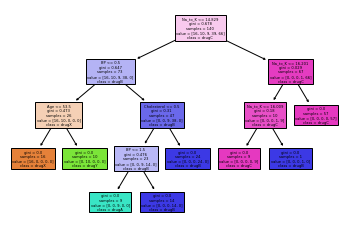

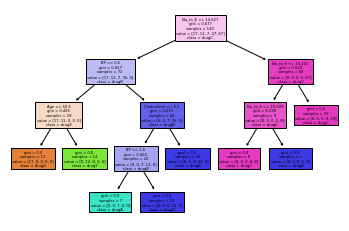

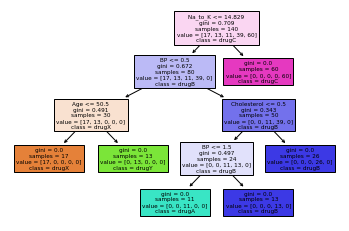

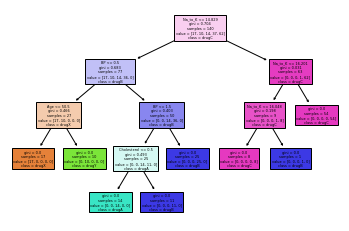

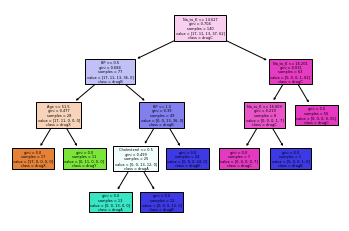

Experiment 	Tree Size		 Accuracy	
1		 15.0000		0.9667	
2		 15.0000		0.9833	
3		 11.0000		0.9833	
4		 15.0000		1.0000	
5		 15.0000		0.9667	

Best Model :- Experiment 4: Tree Size : 15, Accuracy : 1.0


In [14]:
j=0
# Lists to store results
tree_sizes = []
accuracies = []


for i in range(10,60,10):
    exp=pred(i,30)
    tree_size = exp[1]
    accuracy=exp[0]
    accuracies.append(accuracy)
    tree_sizes.append(tree_size)
    

print("Experiment \tTree Size\t\t Accuracy\t")
for i in range(5):
    j+=1
    print(f"{j}\t\t {tree_sizes[i]:.4f}\t\t{accuracies[i]:.4f}\t")


best_experiment = accuracies.index(max(accuracies))
best_tree_size = tree_sizes[best_experiment]

print(f"\nBest Model :- Experiment {best_experiment + 1}: Tree Size : {best_tree_size}, Accuracy : {max(accuracies)}")

# Second experiment:

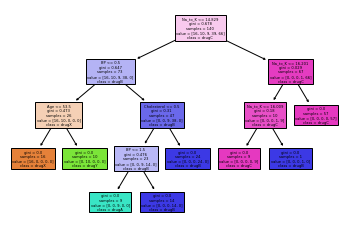

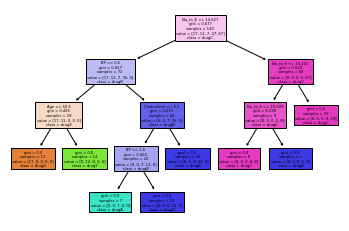

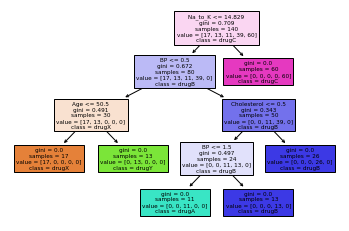

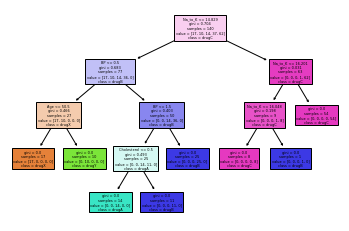

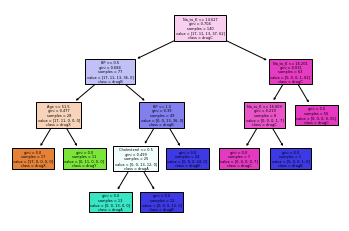

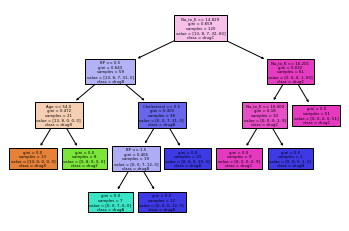

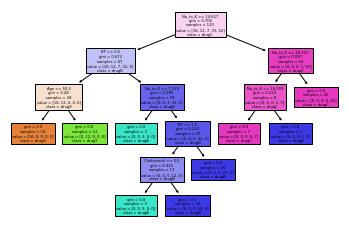

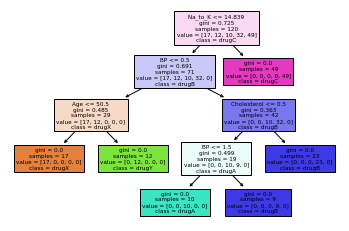

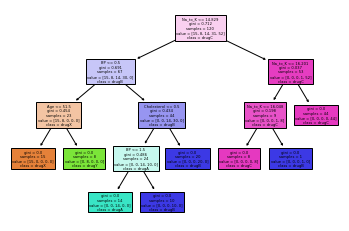

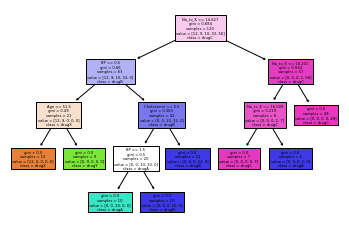

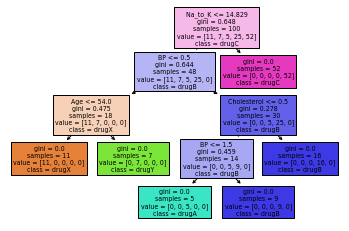

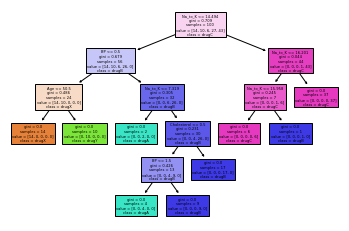

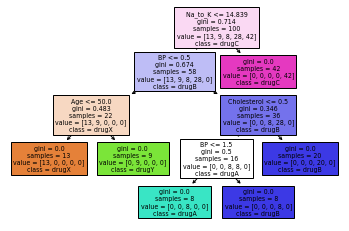

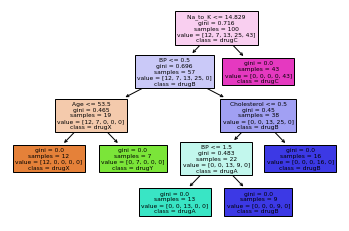

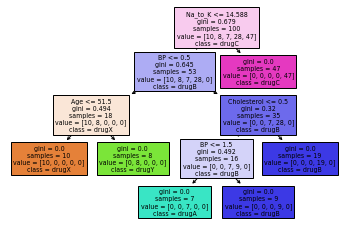

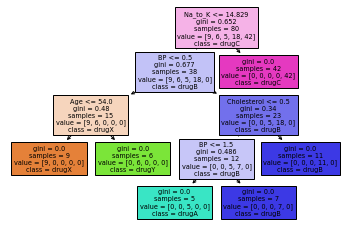

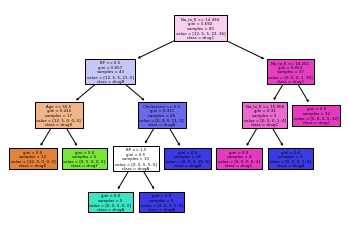

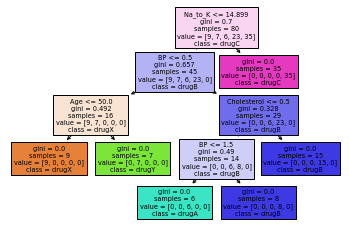

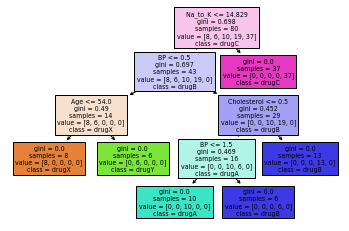

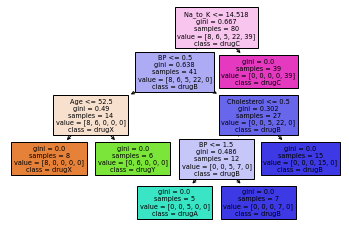

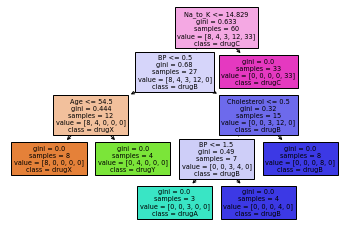

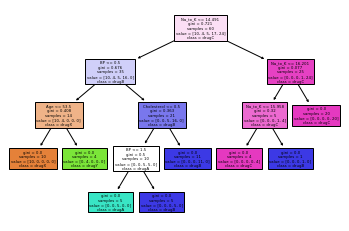

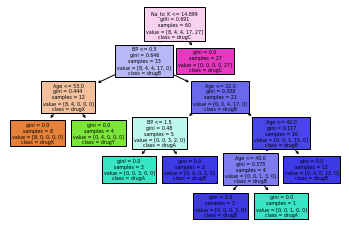

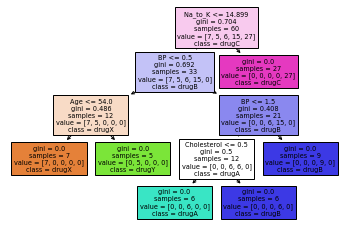

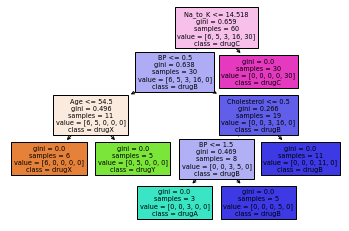

In [15]:
# Lists to store results
acc_means = []
acc_maxs = []
acc_mins = []
tree_size_means = []
tree_size_maxs = []
tree_size_mins = []
for i in range(30,80,10):
    acc_values = []
    tree_size_values = []
    for j in range(10,60,10):
        exp=pred(j,i)
        tree_size = exp[1]
        accuracy=exp[0]
        accuracies.append(accuracy)
        tree_sizes.append(tree_size)
        tree_size_values.append(tree_size)
        acc_values.append(accuracy)
    # Calculate mean, max, and min for accuracy and tree size
    acc_mean = np.mean(acc_values)
    acc_max = np.max(acc_values)
    acc_min = np.min(acc_values)

    tree_size_mean = np.mean(tree_size_values)
    tree_size_max = np.max(tree_size_values)
    tree_size_min = np.min(tree_size_values)

    # Store results for each training set size
    acc_means.append(acc_mean)
    acc_maxs.append(acc_max)
    acc_mins.append(acc_min)
    tree_size_means.append(tree_size_mean)
    tree_size_maxs.append(tree_size_max)
    tree_size_mins.append(tree_size_min)
    
    

# the report

In [16]:
print("Training Size\tMean Accuracy\tMax Accuracy\tMin Accuracy\tMean Tree Size\tMax Tree Size\tMin Tree Size")
j=20
for i in range(5):
    j+=10
    print(f"{j}\t\t{acc_means[i]:.4f}\t\t{acc_maxs[i]:.4f}\t\t{acc_mins[i]:.4f}\t\t{tree_size_means[i]:.2f}\t\t{tree_size_maxs[i]}\t\t{tree_size_mins[i]}")

Training Size	Mean Accuracy	Max Accuracy	Min Accuracy	Mean Tree Size	Max Tree Size	Min Tree Size
30		0.9800		1.0000		0.9667		14.20		15		11
40		0.9750		0.9875		0.9500		14.60		17		11
50		0.9700		0.9900		0.9500		12.20		17		11
60		0.9800		0.9917		0.9750		11.80		15		11
70		0.9600		0.9786		0.9000		12.60		15		11


# Create two plots

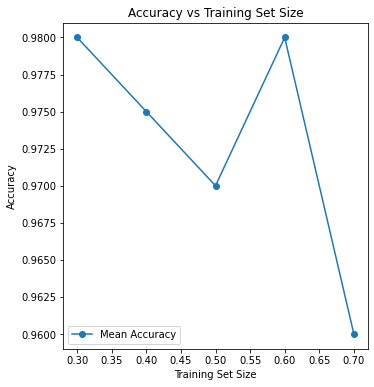

In [17]:
# Create plots
plt.figure(figsize=(12, 6))

# Plot accuracy against training set size
plt.subplot(1, 2, 1)
plt.plot(np.arange(0.3, 0.8, 0.1), acc_means, label='Mean Accuracy', marker='o')
# plt.fill_between(np.arange(0.3, 0.8, 0.1), acc_mins, acc_maxs, alpha=0.2, label='Min-Max Range')
plt.title('Accuracy vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

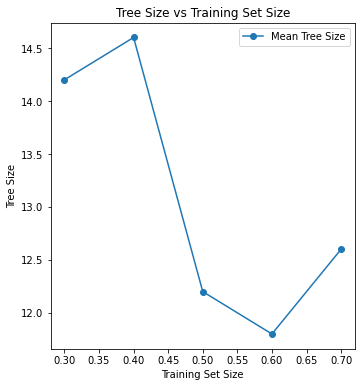

In [18]:
plt.figure(figsize=(12, 6))
# Plot number of nodes in the final tree against training set size
plt.subplot(1, 2, 1)
plt.plot(np.arange(0.3, 0.8, 0.1), tree_size_means, label='Mean Tree Size', marker='o')
# plt.fill_between(np.arange(0.3, 0.8, 0.1), tree_size_mins, tree_size_maxs, alpha=0.2, label='Min-Max Range')
plt.title('Tree Size vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Tree Size')
plt.legend()

plt.show()